## Understanding Multinomial Distribution using Python

### Reza Bagheri

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import binom, multinomial

In [2]:
n = 5
p=[0.5, 0.3, 0.2]
mult = multinomial(n=n, p=p)
mult.pmf([3, 1, 1])

0.15

In [3]:
multinomial.pmf([3, 1, 1], n=n, p=p)

0.15

In [4]:
np.random.seed(2)
multinomial.rvs(n=n, p=p, size = 4)

array([[2, 3, 0],
       [3, 1, 1],
       [2, 2, 1],
       [2, 2, 1]])

In [5]:
n = 5
x1_array = np.arange(0, n+1)
X1_mat, X2_mat = np.meshgrid(x1_array, x1_array)
x3_array = n - X1_mat.flatten() - X2_mat.flatten()

X_mat = np.array([X1_mat.flatten(), X2_mat.flatten(), x3_array]).T
X_mat

array([[ 0,  0,  5],
       [ 1,  0,  4],
       [ 2,  0,  3],
       [ 3,  0,  2],
       [ 4,  0,  1],
       [ 5,  0,  0],
       [ 0,  1,  4],
       [ 1,  1,  3],
       [ 2,  1,  2],
       [ 3,  1,  1],
       [ 4,  1,  0],
       [ 5,  1, -1],
       [ 0,  2,  3],
       [ 1,  2,  2],
       [ 2,  2,  1],
       [ 3,  2,  0],
       [ 4,  2, -1],
       [ 5,  2, -2],
       [ 0,  3,  2],
       [ 1,  3,  1],
       [ 2,  3,  0],
       [ 3,  3, -1],
       [ 4,  3, -2],
       [ 5,  3, -3],
       [ 0,  4,  1],
       [ 1,  4,  0],
       [ 2,  4, -1],
       [ 3,  4, -2],
       [ 4,  4, -3],
       [ 5,  4, -4],
       [ 0,  5,  0],
       [ 1,  5, -1],
       [ 2,  5, -2],
       [ 3,  5, -3],
       [ 4,  5, -4],
       [ 5,  5, -5]])

In [6]:
multinomial(n, p).pmf(X_mat[X_mat[:, 0]==3]).sum()

0.3125

In [7]:
binom.pmf(k=3,n=n, p=p[0])

0.31249999999999983

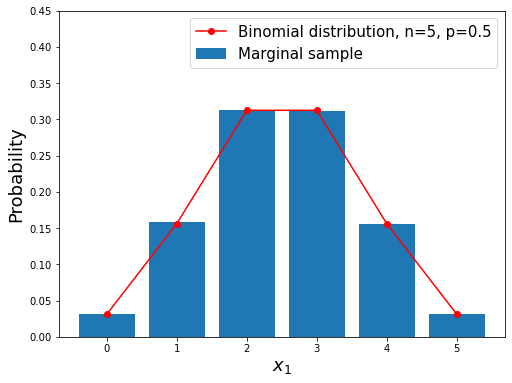

In [8]:
np.random.seed(2)
n = 5
p=[0.5, 0.3, 0.2]
x = np.arange(n+1)
sample = multinomial.rvs(n=n, p=p, size=100000)
pmf_binomial = binom.pmf(k = x,n = n, p = p[0])
sample_marginal = sample[:, 0] 
values, counts = np.unique(sample_marginal, return_counts=True)
probs = counts / counts.sum()

fig = plt.figure(figsize=(8, 6))
plt.bar(values, probs, label='Marginal sample')
plt.plot(x, pmf_binomial, marker='o', color='red',
         label='Binomial distribution, n={}, p={}'.format(n, p[0]))
plt.xlabel('$x_1$', fontsize = 18)
plt.ylabel('Probability', fontsize=18)
plt.ylim([0, 0.45])
plt.legend(loc='best', fontsize = 15)
plt.show()

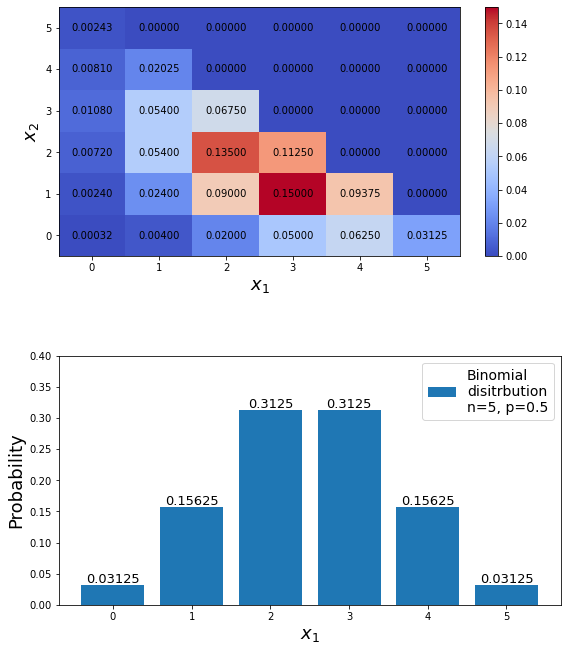

In [9]:
n = 5
p=[0.5, 0.3, 0.2]
x = np.arange(n+1)

x1_array = np.arange(0, n+1)
X1_mat, X2_mat = np.meshgrid(x1_array, x1_array)
x3_array = n - X1_mat.flatten() - X2_mat.flatten()
X_mat = np.array([X1_mat.flatten(), X2_mat.flatten(), x3_array]).T

pmf_mult = multinomial(n, p).pmf(X_mat)
pmf_binomial = binom.pmf(k = x, n = n, p = p[0])
pmf_grid = pmf_mult.reshape(6, 6)

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 11))
plt.subplots_adjust(hspace=0.4)

heatmap = ax1.pcolor(pmf_grid, cmap='coolwarm')
ax1.set_xlabel('$x_1$', fontsize = 18)
ax1.set_ylabel('$x_2$', fontsize = 18)

for x1_pos in range(pmf_grid.shape[0]):
    for x2_pos in range(pmf_grid.shape[1]):
        ax1.text(x1_pos + 0.5, x2_pos + 0.5, 
                '%.5f' % pmf_grid[x2_pos, x1_pos],
                 horizontalalignment='center',
                 verticalalignment='center',
                 )

ax1.set_yticks(np.arange(pmf_grid.shape[0])+0.5)
ax1.set_yticklabels(np.arange(pmf_grid.shape[0]))

ax1.set_xticks(np.arange(pmf_grid.shape[1])+0.5)
ax1.set_xticklabels(np.arange(pmf_grid.shape[1]))
plt.colorbar(heatmap, ax=ax1)

ax2.bar(x, pmf_binomial, label='Binomial\ndisitrbution\nn={}, p={}'.format(n, p[0]))
ax2.bar_label(ax2.containers[0], fontsize = 13)
ax2.set_xlabel('$x_1$', fontsize = 18)
ax2.set_ylim([0, 0.4])
ax2.set_ylabel('Probability', fontsize=18)
ax2.legend(loc='best', fontsize = 14)

plt.show()

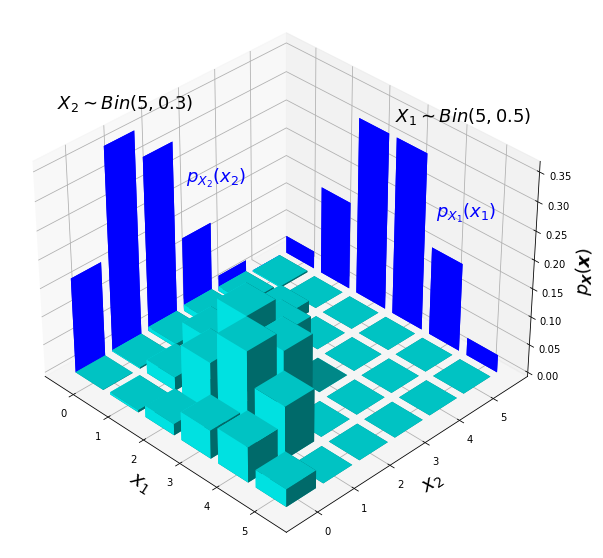

In [10]:
n = 5
p=[0.5, 0.3, 0.2]

x1_array = np.arange(0, n+1)
X1_mat, X2_mat = np.meshgrid(x1_array, x1_array)
x3_array = n - X1_mat.flatten() - X2_mat.flatten()
X_mat = np.array([X1_mat.flatten(), X2_mat.flatten(), x3_array]).T

pmf_mult = multinomial(n, p).pmf(X_mat)
pmf_x1 = binom.pmf(k=x1_array,n=n, p=p[0])
pmf_x2 = binom.pmf(k=x1_array,n=n, p=p[1])

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111, projection='3d')

x1 = X_mat[:, 0]
x2 = X_mat[:, 1]
z = np.zeros(len(x1))

width = 0.8
dx1 = np.repeat(width, len(x1))
dx2 = np.repeat(width, len(x1))

ax1.bar3d(x1-width/2, x2-width/2, z, dx1, dx2, pmf_mult, color='aqua')
ax1.bar3d(x1_array-width/2, np.repeat(6, n+1)-width/2, np.zeros(n+1), np.repeat(0.8, n+1),
          np.zeros(n+1), pmf_x1, color='blue', shade=False)
ax1.bar3d(np.repeat(0, n+1)-width/2, x1_array-width/2, np.zeros(n+1), np.zeros(n+1),
          np.repeat(0.8, n+1), pmf_x2, color='blue', shade=False)

ax1.set_xlabel('$x_1$', fontsize=20)
ax1.set_ylabel('$x_2$', fontsize=20)
ax1.set_zlabel("$p_\mathregular{X}(\mathregular{x})$", weight="bold",
               style="italic", fontsize=18, labelpad = 8)

ax1.text(4.2, 5, 0.25,"$p_{X_1}(x_1)$", fontsize= 18, color='b')
ax1.text(0.7, 1.7, 0.3, "$p_{X_2}(x_2)$", fontsize= 18, color='b')
ax1.text(1.3, 7, 0.25,"$X_1 \sim Bin(5, 0.5)$", fontsize= 18)
ax1.text(-3, 1.7, 0.3, "$X_2 \sim Bin(5, 0.3)$", fontsize= 18)

ax1.view_init(35, -45)
plt.show()

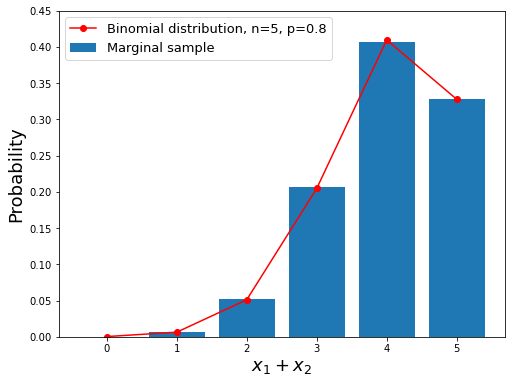

In [11]:
np.random.seed(2)
n = 5
p=[0.5, 0.3, 0.2]
x = np.arange(n+1)
sample = multinomial.rvs(n=n, p=p, size=100000)
pmf_binomial = binom.pmf(k = x,n = n, p = p[0]+p[1])
sample_marginal = sample[:, 0] + sample[:, 1] 
values, counts = np.unique(sample_marginal, return_counts=True)
probs = counts / counts.sum()

fig = plt.figure(figsize=(8, 6))
plt.bar(values, probs, label='Marginal sample')
plt.plot(x, pmf_binomial, marker='o', color='red',
         label='Binomial distribution, n={}, p={}'.format(n, p[0]+p[1]))
plt.xlabel('$x_1+x_2$', fontsize = 18)
plt.ylabel('Probability', fontsize=18)
plt.ylim([0, 0.45])
plt.legend(loc='best', fontsize = 13)

plt.show()

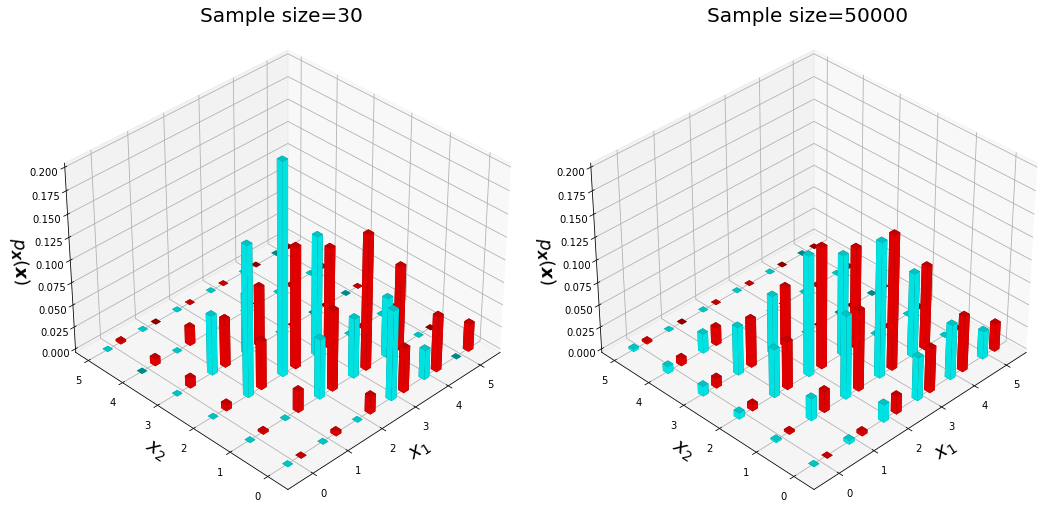

In [12]:
np.random.seed(1)
population = [1]*5 + [2]*3 + [3]*2
n = 5
xedges = np.arange(n+2)
yedges =  np.arange(n+2)
num_samples_list = [30, 50000]

x1_array = np.arange(0, n+1)
X1_mat, X2_mat = np.meshgrid(x1_array, x1_array)
x3_array = n - X1_mat.flatten() - X2_mat.flatten()
X_mat = np.array([X1_mat.flatten(), X2_mat.flatten(), x3_array]).T
pmf_mult = multinomial(n, p).pmf(X_mat)

x1 = X_mat[:, 0]
x2 = X_mat[:, 1]
z = np.zeros(len(x1))
width = 0.15
dx1 = np.repeat(width, len(x1))
dx2 = np.repeat(width, len(x1))

fig = plt.figure(figsize=(18, 10))
plt.subplots_adjust(wspace=0.1)
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
axs = [ax1, ax2]

for i, num_samples in enumerate(num_samples_list):
    samples = np.random.choice(population, size=n*num_samples).reshape(num_samples, n)
    samples_count = np.stack(((samples==1).sum(axis=1),
                              (samples==2).sum(axis=1)), axis=-1)
    H, _, _ = np.histogram2d(samples_count[:, 0], samples_count[:, 1], bins=(xedges, yedges))
    # Histogram does not follow Cartesian convention, therefore transpose H for visualization
    H = H.T / H.sum()
    
    axs[i].bar3d(x1-2*width, x2-width, z, dx1, dx2, H.flatten(),
              color='aqua')
    axs[i].bar3d(x1+width/2, x2-width, z, dx1, dx2, pmf_mult,
              color='red')
    axs[i].set_xlabel('$x_1$', fontsize=20)
    axs[i].set_ylabel('$x_2$', fontsize=20)
    axs[i].set_zlabel("$p_\mathregular{X}(\mathregular{x})$", weight="bold",
                   style="italic", fontsize=18, labelpad = 8)
    axs[i].set_title('Sample size={}'.format(num_samples), fontsize=20)
    axs[i].set_zlim([0, 0.2])
    axs[i].view_init(35, -135)

plt.show()

In [13]:
np.random.seed(50)
num_samples = 5000000
n = 5
p=[0.5, 0.3, 0.2]
sample1 = multinomial.rvs(n=n, p=p, size=num_samples)
sample2 = multinomial.rvs(n=1, p=p, size=n*num_samples).reshape(num_samples, n, len(p)).sum(axis = 1)

In [14]:
(sample1 == [3, 2, 0]).all(axis=1).mean()

0.1124632

In [15]:
(sample2 == [3, 2, 0]).all(axis=1).mean()

0.1125352

In [16]:
n = 5
p=[0.5, 0.3, 0.2]
multinomial(n, p).mean()

array([2.5, 1.5, 1. ])

In [17]:
multinomial(n, p).cov()

array([[ 1.25, -0.75, -0.5 ],
       [-0.75,  1.05, -0.3 ],
       [-0.5 , -0.3 ,  0.8 ]])